In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import zscore
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.stats.multicomp import MultiComparison

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.1
1.2.4
0.11.1


In [3]:
# Read the dataset
df=pd.read_csv("C:/Users/Rajashri/Downloads/SalaryData.csv")
df.head(5)

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
# Information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
# Summary of the data
df.describe().T

count        mean           std      min      25%       50%  \
Salary   40.0  162186.875  64860.407506  50103.0  99897.5  169100.0   

              75%       max  
Salary  214440.75  260151.0

In [6]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate values = %d' % (dups.sum()))
df[dups]

Number of duplicate values = 0


Empty DataFrame
Columns: [Education, Occupation, Salary]
Index: []

In [7]:
# Size of the dataset
print(df.shape)
print("The number of rows in the dataset are", df.shape[0])
print("The number of columns in the dataset are", df.shape[1])

(40, 3)
The number of rows in the dataset are 40
The number of columns in the dataset are 3


In [8]:
print("Observations:")
print("Dataset has 3 columns and 40 rows.")
print("The dataset contains 2 Object type variables and 1 int64 type variable.")
print("No duplicate records.")
print("The dataset provided is for Salary information with respect to Occupation and Education.")

Observations:
Dataset has 3 columns and 40 rows.
The dataset contains 2 Object type variables and 1 int64 type variable.
No duplicate records.
The dataset provided is for Salary information with respect to Occupation and Education.


In [9]:
# Problem 1 - A
# 1.1 Answer for State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually
print("One way ANOVA(Education):")
print('')
print("Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad)")
print('')
print("Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education")
print('')
print("Confidence level = 0.05")
print('')
print('')
print("One way ANOVA(Occupation):")
print('')
print("Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial)")
print('')
print("Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation")
print('')
print("Confidence level = 0.05")

One way ANOVA(Education):

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad)

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education

Confidence level = 0.05


One way ANOVA(Occupation):

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial)

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation

Confidence level = 0.05


In [10]:
n=df.shape[0]*df.shape[1] #total no of observations
k=df.shape[1] #no of groups
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


In [11]:
# Answer for 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
# ONE WAY ANNOVA FOR EDUCATION
formula = 'Salary~Education'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)
print('')
print('Final Outcome:')
print("From the above table, we find that the P value (1.257709e-08) is less than 0.05, hence we can reject the null hypothesis.")

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN

Final Outcome:
From the above table, we find that the P value (1.257709e-08) is less than 0.05, hence we can reject the null hypothesis.


In [12]:
# Answer for 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
# ONE WAY ANNOVA FOR OCCUPATION
formula = 'Salary~Occupation'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)
print('')
print('Final Outcome:')
print("From the above table, we find that the P value (0.4) is greater than 0.05, hence we can not reject the null hypothesis.")

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN

Final Outcome:
From the above table, we find that the P value (0.4) is greater than 0.05, hence we can not reject the null hypothesis.


In [13]:
# Answer for 1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result
compare = MultiComparison(df['Salary'], df['Education'])
result = compare.tukeyhsd()
print(result)
print("Observation:")
print("Bachelors and Doctorate class means are totally different from other two class means.")

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------
Observation:
Bachelors and Doctorate class means are totally different from other two class means.


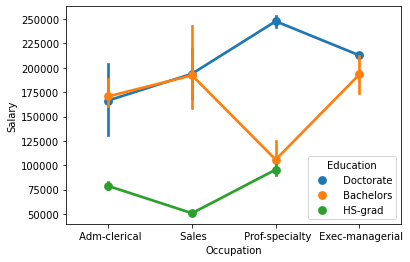

In [14]:
# Problem 1 - B
# Answer for 1.1B- What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=95);

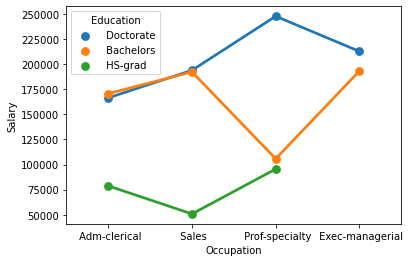

In [15]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

In [16]:
print("Observations:")
print("* Basis on above point plots, we can see that there is good interaction between Doctorate and Bachelors")
print("in the Occupation of Adm-Clerical and Sales.")
print('')
print("* Again, there is some interaction between Bachelors and HS-Grad in the Occupation of Prof-speciality.")
print('')
print("* Also, we can see that there is minimal or no interaction between Doctorate and HS-Grad in any Occupation.")

Observations:
* Basis on above point plots, we can see that there is good interaction between Doctorate and Bachelors
in the Occupation of Adm-Clerical and Sales.

* Again, there is some interaction between Bachelors and HS-Grad in the Occupation of Prof-speciality.

* Also, we can see that there is minimal or no interaction between Doctorate and HS-Grad in any Occupation.


In [17]:
# Answer for 1.2B Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
print("Two way ANOVA(Education and Occupation):")
print('')
print("Null Hypothesis 𝐻0: The means of 'Salary' variable with respect to Education and Occupation is equal")
print('')
print("Alternate Hypothesis 𝐻1: At least one of the means of 'Salary' variable with respect to Education and Occupation is not equal.")
print('')
print("Confidence level = 0.05")
print('')

Two way ANOVA(Education and Occupation):

Null Hypothesis 𝐻0: The means of 'Salary' variable with respect to Education and Occupation is equal

Alternate Hypothesis 𝐻1: At least one of the means of 'Salary' variable with respect to Education and Occupation is not equal.

Confidence level = 0.05



In [18]:
formula = 'Salary ~ C(Education)+C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

In [19]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

In [20]:
print("Observation :")
print("* For variable 'Education', P value(5.466264e-12) is less than significance level(0.05), Hence Null Hypothesis is rejected")
print("And we can say that Education has a significant impact on the mean salary.")
print('')
print("* For variable 'Occupation', P value(7.211580e-02) is greater than significance level (0.05), Hence we cannot reject")
print("Null Hypothesis. Also, we do not have any evidence to say that, in Occupation level there is significant impact")
print("on the mean salary.")
print('')
print("* For interaction variables 'Education and 'Occupation', P value(2.232500e-05) is less than significance level(0.05),")
print("Hence, there is some inetraction between both the variables and have significant impact to some extent on the salary.")

Observation :
* For variable 'Education', P value(5.466264e-12) is less than significance level(0.05), Hence Null Hypothesis is rejected
And we can say that Education has a significant impact on the mean salary.

* For variable 'Occupation', P value(7.211580e-02) is greater than significance level (0.05), Hence we cannot reject
Null Hypothesis. Also, we do not have any evidence to say that, in Occupation level there is significant impact
on the mean salary.

* For interaction variables 'Education and 'Occupation', P value(2.232500e-05) is less than significance level(0.05),
Hence, there is some inetraction between both the variables and have significant impact to some extent on the salary.


In [21]:
# Answer for 1.3B - Explain the business implications of performing ANOVA for this particular case study.
print("Assuming given report is for HR departments of a company below are the observations/takeaways:")
print("* An Employee or a Graduate's salary is depend on level of Education as compared to the Occupation.")
print("* Above case study shows conclusion about the effect of Education and Occupation on Salary.")
print("* We can see that, Doctorate would probably earn higher salary than Bachelors and HS-Grads. However, it also true that")
print("Being Doctorate is not necessarily mean that they have higher salary than Bachelors and HS-Grads.")
print("* Above point shows an important inference that a Doctorate graduate may not be highly preffered for a job role and maybe")
print("considered over-qualified for a job role.")
print("* HR professional may need to have a more detailed approach towards salary bands.")
print("None the less,work experience remains an important factor while deciding salary.")
print("* ANOVA test shows that Occupation level with higher educational qualification have significant impact on the salary.")
print("However, Occupation type/level may not be alone significant influencer as compared to education.")

Assuming given report is for HR departments of a company below are the observations/takeaways:
* An Employee or a Graduate's salary is depend on level of Education as compared to the Occupation.
* Above case study shows conclusion about the effect of Education and Occupation on Salary.
* We can see that, Doctorate would probably earn higher salary than Bachelors and HS-Grads. However, it also true that
Being Doctorate is not necessarily mean that they have higher salary than Bachelors and HS-Grads.
* Above point shows an important inference that a Doctorate graduate may not be highly preffered for a job role and maybe
considered over-qualified for a job role.
* HR professional may need to have a more detailed approach towards salary bands.
None the less,work experience remains an important factor while deciding salary.
* ANOVA test shows that Occupation level with higher educational qualification have significant impact on the salary.
However, Occupation type/level may not be alone sig

In [22]:
# Starting Problem 2:
#Get the data
df1=pd.read_csv("C:/Users/Rajashri/Downloads/EducationPost12thStandard.csv")
df1.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [23]:
# Size of the dataset
print(df1.shape)
print("The number of rows in the dataset are", df1.shape[0])
print("The number of columns in the dataset are", df1.shape[1])

(777, 18)
The number of rows in the dataset are 777
The number of columns in the dataset are 18


In [24]:
# Information about Features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [25]:
# Summary of the Dataset
df1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [26]:
# Are there any duplicates ?
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [27]:
df1.isnull().values.any()

False

In [28]:
# Dropped Names column to check outliers in numeric data
df2=copy.deepcopy(df1)
del df2['Names']
df2.head(5)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [29]:
# Renamed of some columns for avoiding coding problem
df2.rename(columns={'F.Undergrad':'FUndergrad', 'P.Undergrad':'PUndergrad', 'S.F.Ratio': 'SFRatio', 'Grad.Rate': 'GradRate','Room.Board': 'RoomBoard','perc.alumni':'PercAlumni'},inplace=True)
df2.head(5)

Apps  Accept  Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0  1660    1232     721         23         52        2885         537   
1  2186    1924     512         16         29        2683        1227   
2  1428    1097     336         22         50        1036          99   
3   417     349     137         60         89         510          63   
4   193     146      55         16         44         249         869   

   Outstate  RoomBoard  Books  Personal  PhD  Terminal  SFRatio  PercAlumni  \
0      7440       3300    450      2200   70        78     18.1          12   
1     12280       6450    750      1500   29        30     12.2          16   
2     11250       3750    400      1165   53        66     12.9          30   
3     12960       5450    450       875   92        97      7.7          37   
4      7560       4120    800      1500   76        72     11.9           2   

   Expend  GradRate  
0    7041        60  
1   10527        56  
2    8735        54  
3   19016        59  
4   10922        15

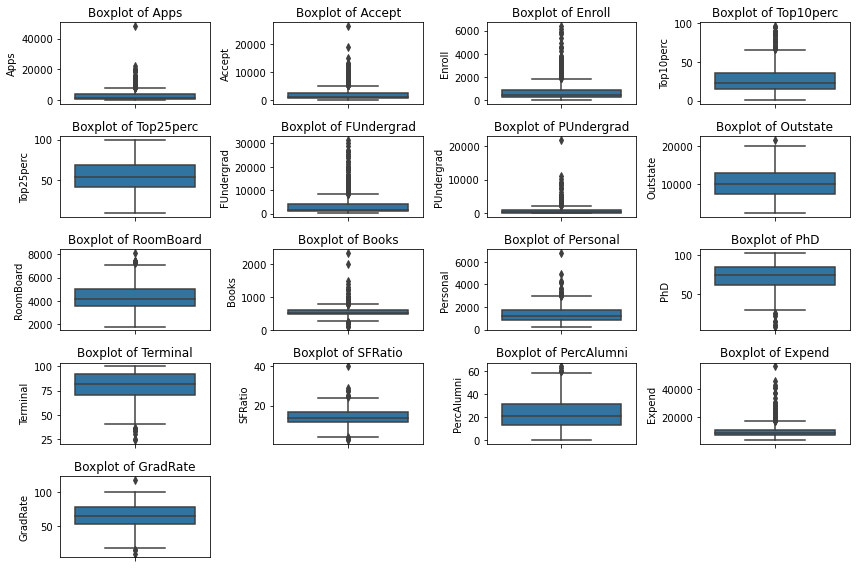

In [30]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df2.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df2[feature_list[i]], data = df2, orient="h")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout();

In [31]:
print("Observations:")
print("* The Education dataset has 777 rows and 18 columns.")
print("* The dataset contains 18 variables out of which (S.F.Ratio) is float64, 16 are int64 and (Name) is object datatype.")
print("* There are no missing values in the dataset.")
print("* No Duplicate records present in the dataset.")
print("* Outliers are present in the given dataset and those are not treated hence results may not be fully very accurate.")

Observations:
* The Education dataset has 777 rows and 18 columns.
* The dataset contains 18 variables out of which (S.F.Ratio) is float64, 16 are int64 and (Name) is object datatype.
* There are no missing values in the dataset.
* No Duplicate records present in the dataset.
* Outliers are present in the given dataset and those are not treated hence results may not be fully very accurate.


count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64


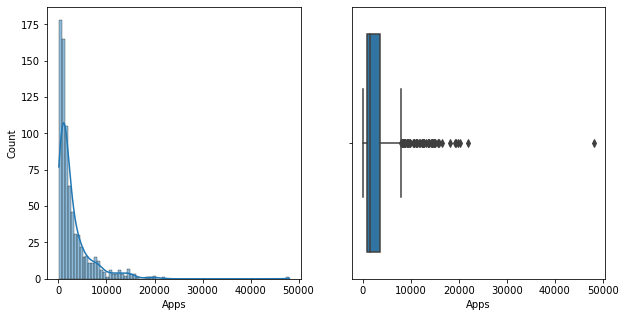

Observations:
* Mean number of aplications is 3001 and the Median is 1558.
* Maximum number of applications are 48094.
* The distribution is highly right skewed.
* Outliers are present in Apps variable.


In [32]:
# Started Problem - 2
# Answer for 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?
# Univariate Analysis on Total Applications :
print(df2.Apps.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Apps, kde=True,ax=axs[0])
sns.boxplot(x='Apps',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of aplications is 3001 and the Median is 1558.")
print("* Maximum number of applications are 48094.")
print("* The distribution is highly right skewed.")
print("* Outliers are present in Apps variable.")

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64


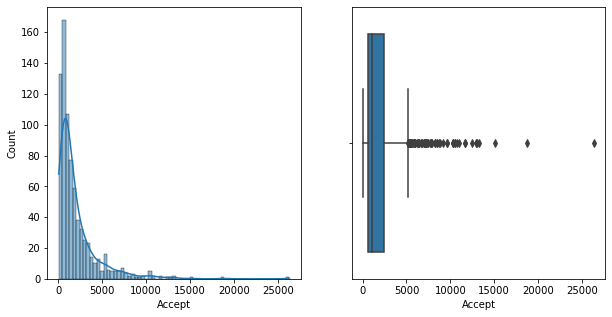

Observations:
* Mean number of acceptance is 2018 and the Median is 1110.
* Maximum number of acceptance is 26330.
* The distribution is highly right skewed.
* Outliers are present in Accept variable.


In [33]:
# Univariate Analysis on Accept :
print(df2.Accept.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Accept, kde=True,ax=axs[0])
sns.boxplot(x='Accept',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of acceptance is 2018 and the Median is 1110.")
print("* Maximum number of acceptance is 26330.")
print("* The distribution is highly right skewed.")
print("* Outliers are present in Accept variable.")

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64


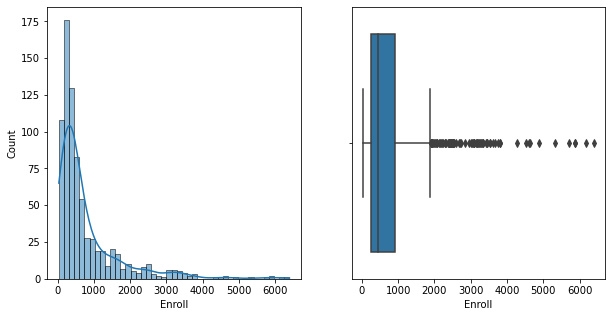

Observations:
* Mean number of enrollments is 779 and the Median is 434.
* Maximum number of enrollment is 6392.
* The distribution is highly right skewed.
* Outliers are present in Enroll variable.


In [34]:
# Univariate Analysis on Enroll :
print(df2.Enroll.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Enroll, kde=True,ax=axs[0])
sns.boxplot(x='Enroll',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of enrollments is 779 and the Median is 434.")
print("* Maximum number of enrollment is 6392.")
print("* The distribution is highly right skewed.")
print("* Outliers are present in Enroll variable.")

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64


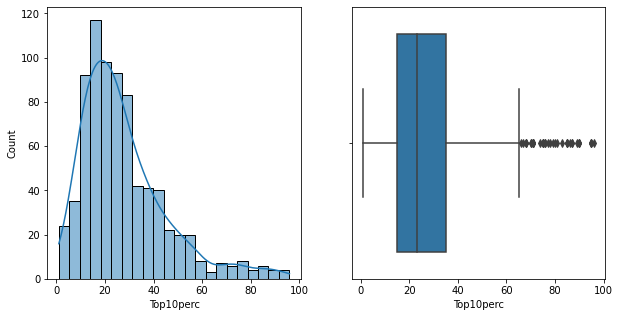

Observations:
* The Mean percentage of students from Top10 schools is 27% and the Median is 23%.
* Almost 20 Universities have more than 50% of its Student population have come from the best schools.
* Approximately there are 10 Universities each having its student population of 80% and 90% who comes from Top 10 schools.


In [35]:
# Univariate Analysis on Top10perc :
print(df2.Top10perc.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Top10perc, kde=True,ax=axs[0])
sns.boxplot(x='Top10perc',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean percentage of students from Top10 schools is 27% and the Median is 23%.")
print("* Almost 20 Universities have more than 50% of its Student population have come from the best schools.")
print("* Approximately there are 10 Universities each having its student population of 80% and 90% who comes from Top 10 schools.")

count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64


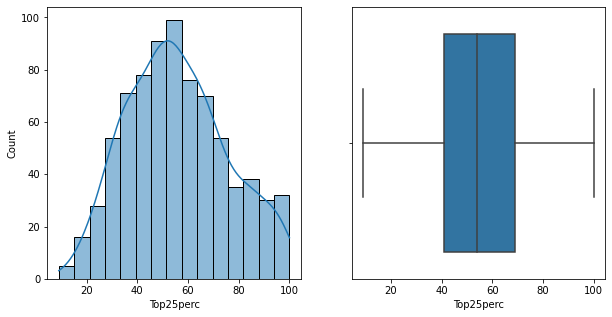

Observations:
* The Mean percentage of students from Top25 schools is 55% and the Median is 54%.
* Approximately 69% students are from Top 25 schools.
* The distribution is somewhat normally distributed. 
* There are no outliers present in this variable.


In [36]:
# Univariate Analysis on Top25perc :
print(df2.Top25perc.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Top25perc, kde=True,ax=axs[0])
sns.boxplot(x='Top25perc',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean percentage of students from Top25 schools is 55% and the Median is 54%.")
print("* Approximately 69% students are from Top 25 schools.")
print("* The distribution is somewhat normally distributed. ")
print("* There are no outliers present in this variable.")

count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: FUndergrad, dtype: float64


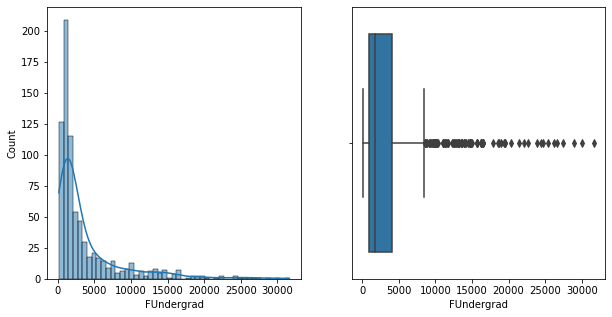

Observations:
* The Mean number of students from FUndergrad is 3699 and the Median is 1707.
* Maximum number of students from FUndergrad is 31643.
* The distribution is highly rightskewed.


In [37]:
# Univariate Analysis on FUndergrad :
print(df2.FUndergrad.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.FUndergrad, kde=True,ax=axs[0])
sns.boxplot(x='FUndergrad',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean number of students from FUndergrad is 3699 and the Median is 1707.")
print("* Maximum number of students from FUndergrad is 31643.")
print("* The distribution is highly rightskewed.")

count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: PUndergrad, dtype: float64


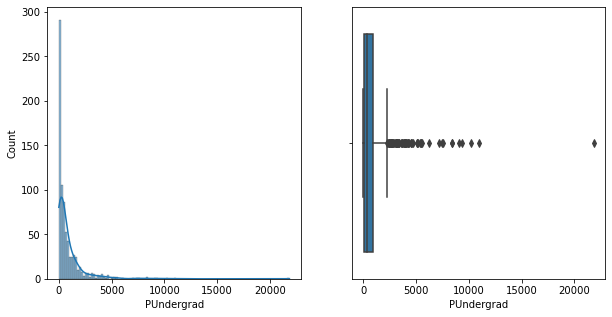

Observations:
* The Mean number of student from PUndergrad is 1 and median number is 967.
* Maximum number of students from PUndergrad is 21836.
* The distribution is rightskewed only.


In [38]:
# Univariate Analysis on PUndergrad :
print(df2.PUndergrad.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.PUndergrad, kde=True,ax=axs[0])
sns.boxplot(x='PUndergrad',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean number of student from PUndergrad is 1 and median number is 967.")
print("* Maximum number of students from PUndergrad is 21836.")
print("* The distribution is rightskewed only.")

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64


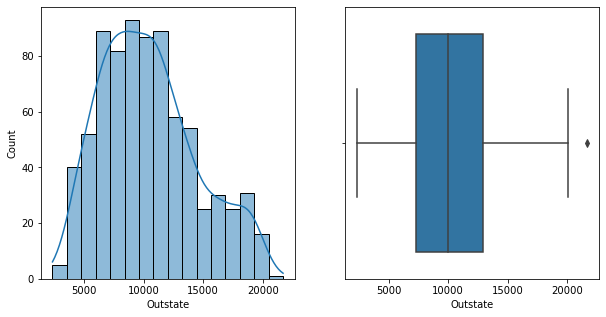

Observations:
* The Mean number of students from outstate is 10440 and the Median is 9990.
* Maximum number of students from outstate is 21700.
* The distribution is somewhat normally distributed.


In [39]:
# Univariate Analysis on Outstate :
print(df2.Outstate.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Outstate, kde=True,ax=axs[0])
sns.boxplot(x='Outstate',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean number of students from outstate is 10440 and the Median is 9990.")
print("* Maximum number of students from outstate is 21700.")
print("* The distribution is somewhat normally distributed.")

count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: RoomBoard, dtype: float64


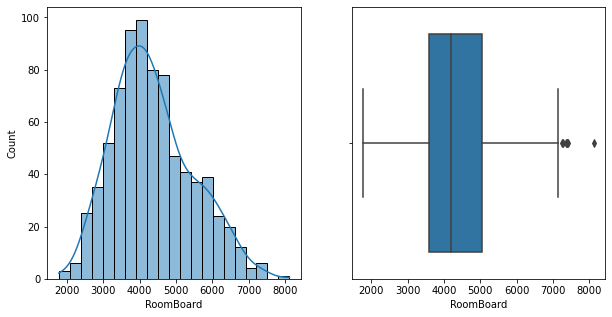

Observations:
* Mean number of RoomBoards are 4357 and the Median is 4200.
* Maximum expense stands at $8124.
* The distribution is somewhat normally distributed.


In [40]:
# Univariate Analysis on Room Board :
print(df2.RoomBoard.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.RoomBoard, kde=True,ax=axs[0])
sns.boxplot(x='RoomBoard',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of RoomBoards are 4357 and the Median is 4200.")
print("* Maximum expense stands at $8124.")
print("* The distribution is somewhat normally distributed.")

count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64


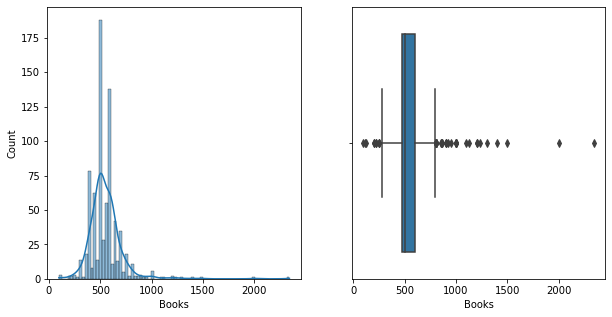

Observations:
* Mean number of books are 549 and the Median is 500.
* The maximum expense on books is $2340.
* The distribution is somewhat left skewed.


In [41]:
# Univariate Analysis on Books :
print(df2.Books.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Books, kde=True,ax=axs[0])
sns.boxplot(x='Books',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of books are 549 and the Median is 500.")
print("* The maximum expense on books is $2340.")
print("* The distribution is somewhat left skewed.")

count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64


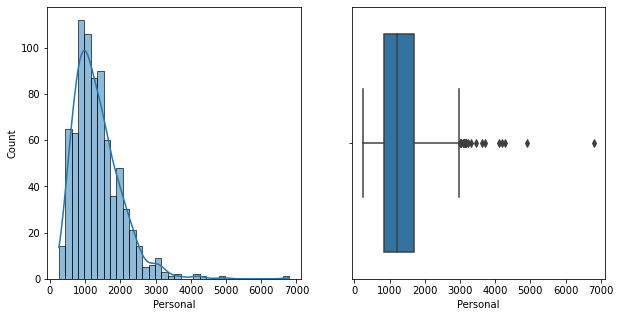

Observations:
* Mean number of Personal spend is 1340 and the Median is 1200.
* The maximum spend for a student on personal is $6800 and the minimum spend is $250.
* The distribution is somewhat right skewed.


In [42]:
# Univariate Analysis on Personal :
print(df2.Personal.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Personal, kde=True,ax=axs[0])
sns.boxplot(x='Personal',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of Personal spend is 1340 and the Median is 1200.")
print("* The maximum spend for a student on personal is $6800 and the minimum spend is $250.")
print("* The distribution is somewhat right skewed.")

count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64


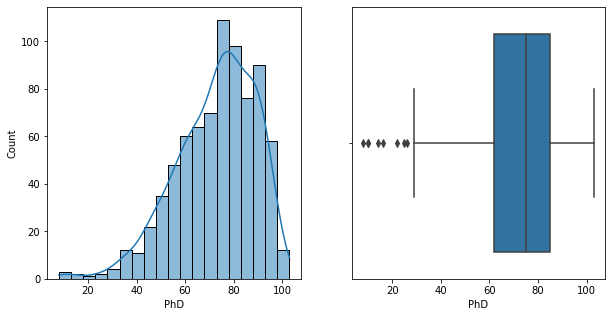

Observations:
* Mean number of PhD faculty is 72% and the Median is 75%.
* Max percentage of PhD faculties exceeds 100(i.e.103).
* The distribution is left skewed.


In [43]:
# Univariate Analysis on PhD :
print(df2.PhD.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.PhD, kde=True,ax=axs[0])
sns.boxplot(x='PhD',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of PhD faculty is 72% and the Median is 75%.")
print("* Max percentage of PhD faculties exceeds 100(i.e.103).")
print("* The distribution is left skewed.")

count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64


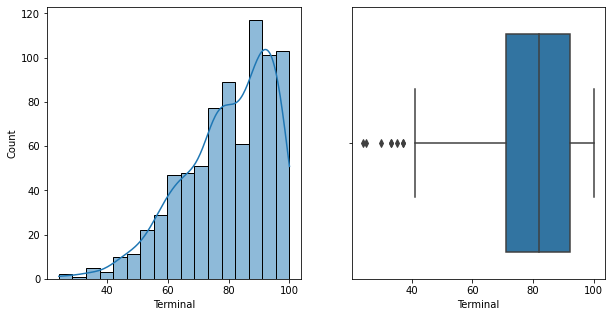

Observations:
* Mean number of Terminal is 79% and the Median is 82%.
* The maximum Percentage of faculties with terminal degree is 100% .
* The distribution is left skewed.


In [44]:
# Univariate Analysis on Terminal :
print(df2.Terminal.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Terminal, kde=True,ax=axs[0])
sns.boxplot(x='Terminal',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of Terminal is 79% and the Median is 82%.")
print("* The maximum Percentage of faculties with terminal degree is 100% .")
print("* The distribution is left skewed.")

count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: SFRatio, dtype: float64


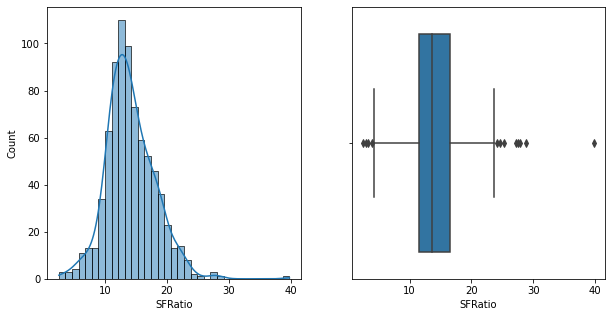

Observations:
* Mean number of SFRatio is 14 and the Median is 13.
* The maximum SF Ratio is 39.
* The distribution looks nearly Normally distributed.


In [45]:
# Univariate Analysis on S.F.Ratio :
print(df2.SFRatio.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.SFRatio, kde=True,ax=axs[0])
sns.boxplot(x='SFRatio',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of SFRatio is 14 and the Median is 13.")
print("* The maximum SF Ratio is 39.")
print("* The distribution looks nearly Normally distributed.")

count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: PercAlumni, dtype: float64


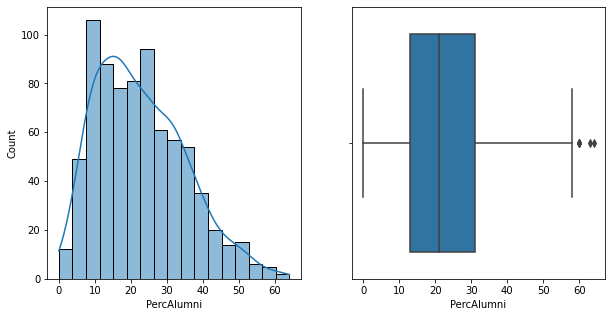

Observations:
* Mean number of Alumni is 22% and median is 21%.
* The lowest percentage of Alumni who donates is 0.
* The distribution is somewhat normally distributed.


In [46]:
# Univariate Analysis on Perc.Alumni :
print(df2.PercAlumni.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.PercAlumni, kde=True,ax=axs[0])
sns.boxplot(x='PercAlumni',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean number of Alumni is 22% and median is 21%.")
print("* The lowest percentage of Alumni who donates is 0.")
print("* The distribution is somewhat normally distributed.")

count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64


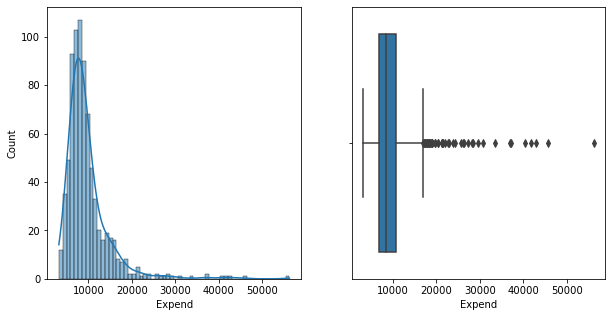

Observations:
* The Mean number of instructional expenditure per student is $9660 and Median is $8377 .
* The highest expenditure on a student is $56233
* The distribution is right skewed.


In [47]:
# Univariate Analysis on Expend :
print(df2.Expend.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.Expend, kde=True,ax=axs[0])
sns.boxplot(x='Expend',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* The Mean number of instructional expenditure per student is $9660 and Median is $8377 .")
print("* The highest expenditure on a student is $56233")
print("* The distribution is right skewed.")

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: GradRate, dtype: float64


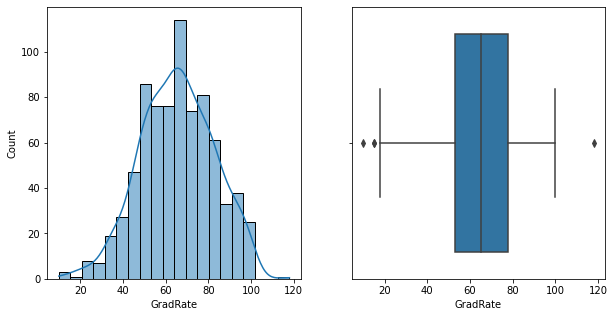

Observations:
* Mean and Median number of GradRate is 65 respectively.
* The lowest graduation rate is 10%.
* The distribution is somewhat normally distributed.


In [48]:
# Univariate Analysis on GradRate :
print(df2.GradRate.describe())
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(df2.GradRate, kde=True,ax=axs[0])
sns.boxplot(x='GradRate',data=df2,ax=axs[1]);
plt.show()
print("Observations:")
print("* Mean and Median number of GradRate is 65 respectively.")
print("* The lowest graduation rate is 10%.")
print("* The distribution is somewhat normally distributed.")

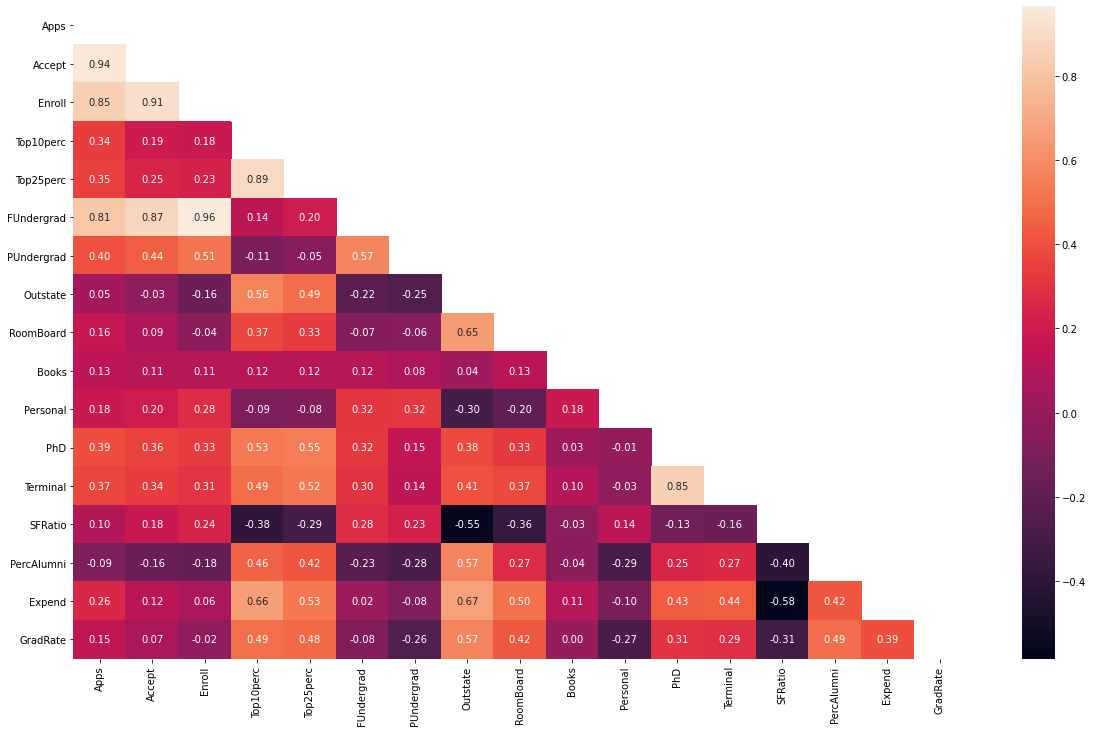

Observations:
Heatmap shows correlation coefficients.
Basis on above Heatmap we can see that there are some pairs which have some correlation:
* Application and Acceptance
* Students from top10% schools and graduation rate
* Terminal and PhD qualified faculties 
* Fulltime undergrad students and enrolment
* Students from top 10% and 25% schools.


In [49]:
# Multivariate Analysis by using Heatmap
corr=df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(20, 12))
sns.heatmap(df2.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()
print("Observations:")
print("Heatmap shows correlation coefficients.")
print("Basis on above Heatmap we can see that there are some pairs which have some correlation:")
print("* Application and Acceptance")
print("* Students from top10% schools and graduation rate")
print("* Terminal and PhD qualified faculties ")
print("* Fulltime undergrad students and enrolment")
print("* Students from top 10% and 25% schools.")

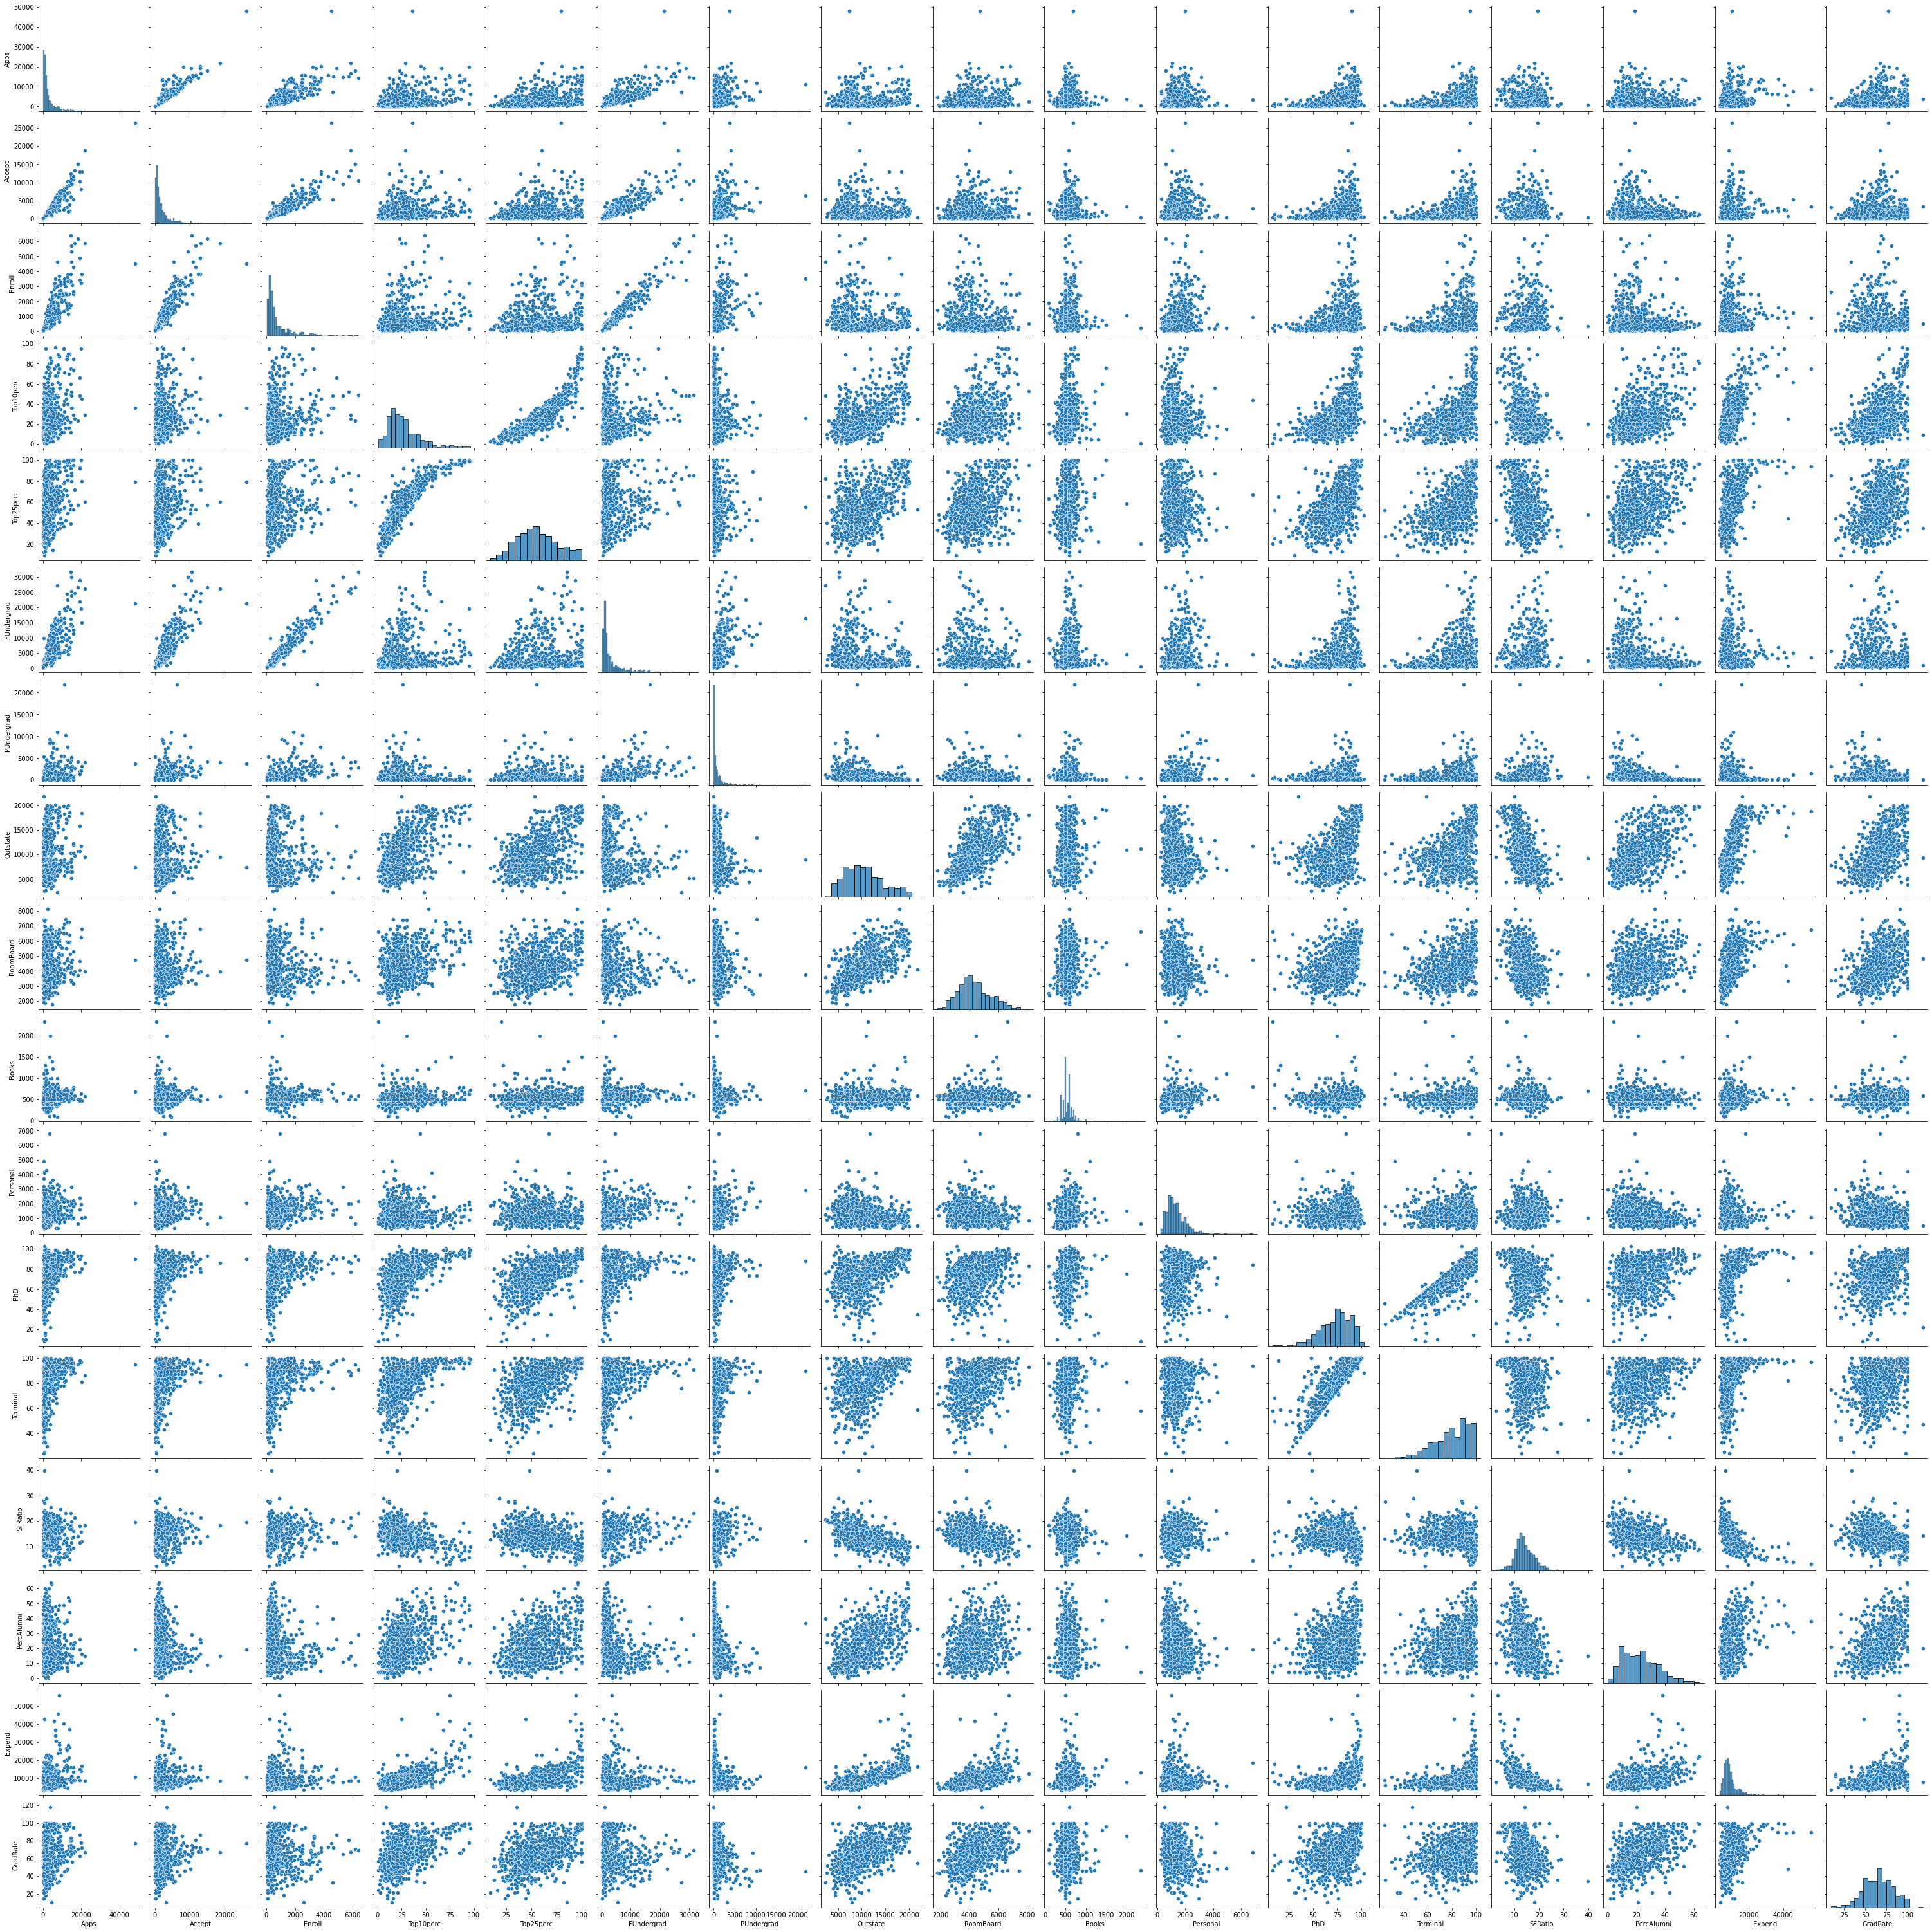

In [50]:
#Multivariate Analysis by using Pair Plot
sns.pairplot(df2);

In [51]:
# Answer for question 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.
# Scale the data
print('Is Scaling necessary for PCA:')
print("1.The main objective of Scaling is to Normalize the data within a particular range. It is a step of data preprocessing")
print("Which is applied on independant variables.")
print("2. In given dataset,we have mixed numerical data where each attribute is different and not comparable like RoomBoard,GradRate,")
print("Price.")
print("3. Hence, we need to scaling for given data. Data scaling can be done by applying Z-Score or from Sklearn StandardScaler.")
df2_pca_scaled = df2.apply(zscore)
df2_pca_scaled.head(5)

Is Scaling necessary for PCA:
1.The main objective of Scaling is to Normalize the data within a particular range. It is a step of data preprocessing
Which is applied on independant variables.
2. In given dataset,we have mixed numerical data where each attribute is different and not comparable like RoomBoard,GradRate,
Price.
3. Hence, we need to scaling for given data. Data scaling can be done by applying Z-Score or from Sklearn StandardScaler.


Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  PUndergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827   -0.168116   -0.209207   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911   -0.209788    0.244307   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878   -0.549565   -0.497090   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612   -0.658079   -0.520752   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031   -0.711924    0.009005   

   Outstate  RoomBoard     Books  Personal       PhD  Terminal   SFRatio  \
0 -0.746356  -0.964905 -0.602312  1.270045 -0.163028 -0.115729  1.013776   
1  0.457496   1.909208  1.215880  0.235515 -2.675646 -3.378176 -0.477704   
2  0.201305  -0.554317 -0.905344 -0.259582 -1.204845 -0.931341 -0.300749   
3  0.626633   0.996791 -0.602312 -0.688173  1.185206  1.175657 -1.615274   
4 -0.716508  -0.216723  1.518912  0.235515  0.204672 -0.523535 -0.553542   

   PercAlumni    Expend  GradRate  
0   -0.867574 -0.501910 -0.318252  
1   -0.544572  0.166110 -0.551262  
2    0.585935 -0.177290 -0.667767  
3    1.151188  1.792851 -0.376504  
4   -1.675079  0.241803 -2.939613

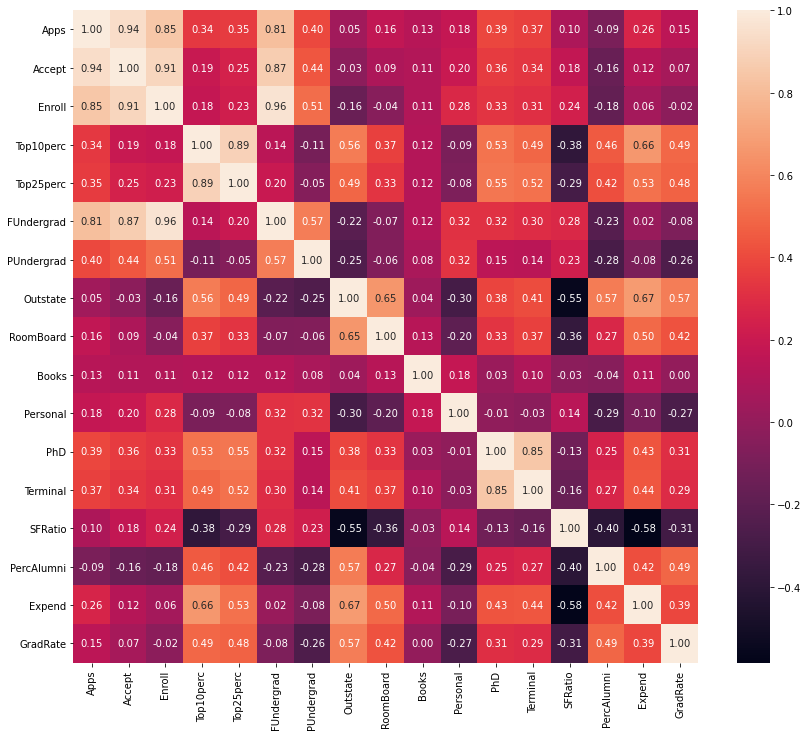

Final Outcome:
* Correlation is a scaled version of covariance.When the sign is positive the variables are said to be positively correlated.
When the sign is negative the variables are said to be negatively correlated and when the sign is 0,
it is said that variables are uncorrelated.
* Correlation measures both strength and direction of the linear relationship between two variables.
* Covariance is a measure used to determine how much two variables changes. It indicates the direction of the linear
relationship between variables.


In [52]:
# Answer for 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]
#Check for presence of correlations on scaled data
plt.figure(figsize = (14,12))
sns.heatmap(df2_pca_scaled.corr(), annot=True,fmt='.2f');
plt.show()
print("Final Outcome:")
print("* Correlation is a scaled version of covariance.When the sign is positive the variables are said to be positively correlated.")
print("When the sign is negative the variables are said to be negatively correlated and when the sign is 0,")
print("it is said that variables are uncorrelated.")
print("* Correlation measures both strength and direction of the linear relationship between two variables.")
print("* Covariance is a measure used to determine how much two variables changes. It indicates the direction of the linear")
print("relationship between variables.")

In [53]:
df2_pca_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  FUndergrad  \
Apps        1.001289  0.944666  0.847913   0.339270   0.352093    0.815540   
Accept      0.944666  1.001289  0.912811   0.192695   0.247795    0.875350   
Enroll      0.847913  0.912811  1.001289   0.181527   0.227037    0.965883   
Top10perc   0.339270  0.192695  0.181527   1.001289   0.893144    0.141471   
Top25perc   0.352093  0.247795  0.227037   0.893144   1.001289    0.199702   
FUndergrad  0.815540  0.875350  0.965883   0.141471   0.199702    1.001289   
PUndergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646    0.571247   
Outstate    0.050224 -0.025788 -0.155678   0.563055   0.490024   -0.216020   
RoomBoard   0.165152  0.091016 -0.040284   0.371959   0.331917   -0.068979   
Books       0.132729  0.113672  0.112856   0.119012   0.115676    0.115699   
Personal    0.178961  0.201248  0.281291  -0.093437  -0.080914    0.317608   
PhD         0.391201  0.356216  0.331896   0.532513   0.546566    0.318747   
Terminal    0.369968  0.338018  0.308671   0.491768   0.525425    0.300406   
SFRatio     0.095756  0.176456  0.237577  -0.385370  -0.295009    0.280064   
PercAlumni -0.090342 -0.160196 -0.181027   0.456072   0.418403   -0.229758   
Expend      0.259927  0.124878  0.064252   0.661765   0.528127    0.018676   
GradRate    0.146944  0.067399 -0.022370   0.495627   0.477896   -0.078875   

            PUndergrad  Outstate  RoomBoard     Books  Personal       PhD  \
Apps          0.398777  0.050224   0.165152  0.132729  0.178961  0.391201   
Accept        0.441839 -0.025788   0.091016  0.113672  0.201248  0.356216   
Enroll        0.513730 -0.155678  -0.040284  0.112856  0.281291  0.331896   
Top10perc    -0.105492  0.563055   0.371959  0.119012 -0.093437  0.532513   
Top25perc    -0.053646  0.490024   0.331917  0.115676 -0.080914  0.546566   
FUndergrad    0.571247 -0.216020  -0.068979  0.115699  0.317608  0.318747   
PUndergrad    1.001289 -0.253839  -0.061405  0.081304  0.320294  0.149306   
Outstate     -0.253839  1.001289   0.655100  0.038905 -0.299472  0.383476   
RoomBoard    -0.061405  0.655100   1.001289  0.128128 -0.199685  0.329627   
Books         0.081304  0.038905   0.128128  1.001289  0.179526  0.026940   
Personal      0.320294 -0.299472  -0.199685  0.179526  1.001289 -0.010950   
PhD           0.149306  0.383476   0.329627  0.026940 -0.010950  1.001289   
Terminal      0.142086  0.408509   0.375022  0.100084 -0.030653  0.850682   
SFRatio       0.232830 -0.555536  -0.363095 -0.031970  0.136521 -0.130698   
PercAlumni   -0.281154  0.566992   0.272714 -0.040260 -0.286337  0.249330   
Expend       -0.083676  0.673646   0.502386  0.112554 -0.098018  0.433319   
GradRate     -0.257332  0.572026   0.425489  0.001062 -0.269691  0.305431   

            Terminal   SFRatio  PercAlumni    Expend  GradRate  
Apps        0.369968  0.095756   -0.090342  0.259927  0.146944  
Accept      0.338018  0.176456   -0.160196  0.124878  0.067399  
Enroll      0.308671  0.237577   -0.181027  0.064252 -0.022370  
Top10perc   0.491768 -0.385370    0.456072  0.661765  0.495627  
Top25perc   0.525425 -0.295009    0.418403  0.528127  0.477896  
FUndergrad  0.300406  0.280064   -0.229758  0.018676 -0.078875  
PUndergrad  0.142086  0.232830   -0.281154 -0.083676 -0.257332  
Outstate    0.408509 -0.555536    0.566992  0.673646  0.572026  
RoomBoard   0.375022 -0.363095    0.272714  0.502386  0.425489  
Books       0.100084 -0.031970   -0.040260  0.112554  0.001062  
Personal   -0.030653  0.136521   -0.286337 -0.098018 -0.269691  
PhD         0.850682 -0.130698    0.249330  0.433319  0.305431  
Terminal    1.001289 -0.160310    0.267475  0.439365  0.289900  
SFRatio    -0.160310  1.001289   -0.403448 -0.584584 -0.307106  
PercAlumni  0.267475 -0.403448    1.001289  0.418250  0.491530  
Expend      0.439365 -0.584584    0.418250  1.001289  0.390846  
GradRate    0.289900 -0.307106    0.491530  0.390846  1.001289

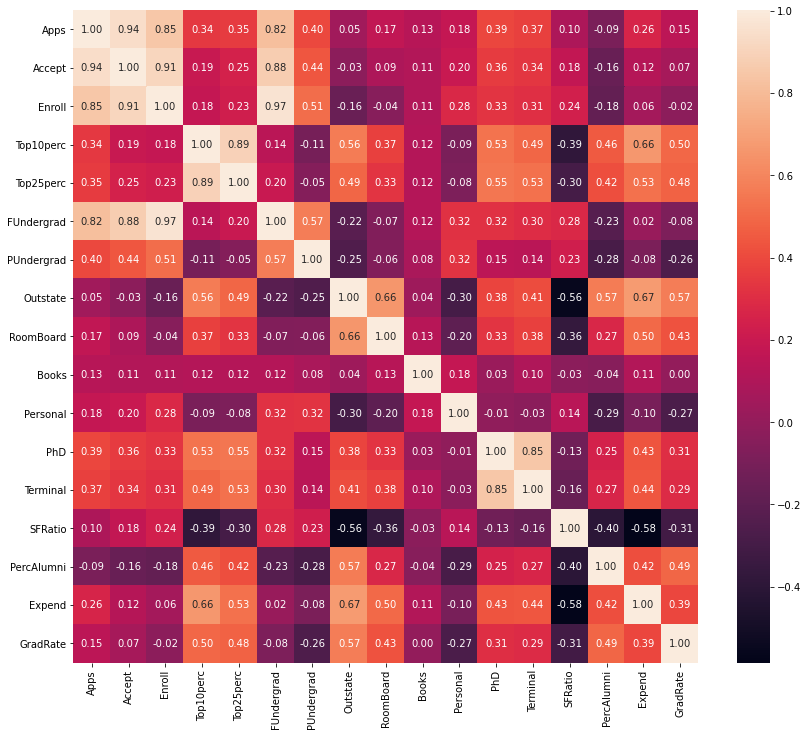

In [66]:
plt.figure(figsize = (14,12))
sns.heatmap(df2_pca_scaled.cov(), annot=True,fmt='.2f');
plt.show()

In [54]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
chi_square_value,p_value=calculate_bartlett_sphericity(df2_pca_scaled)
p_value

0.0

In [55]:
kmo_all,kmo_model=calculate_kmo(df2_pca_scaled)
kmo_model

0.8131251200373523

 Before scaling we have checked outliers by using boxplot and the data looks like-


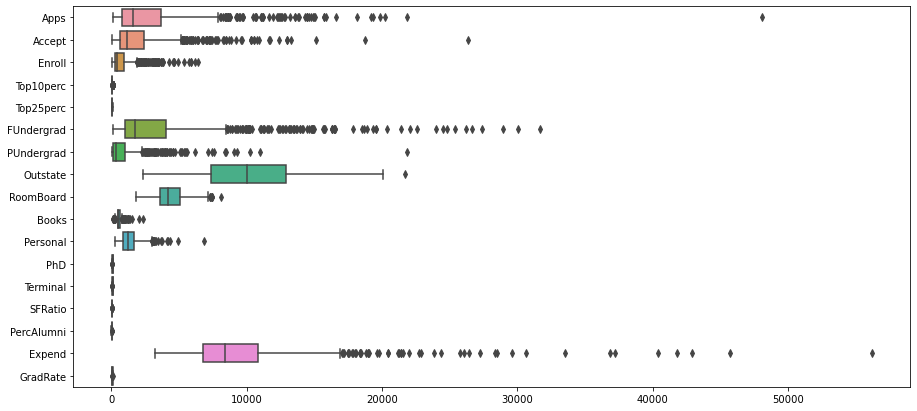

After scaling the data we are checking outliers by using same boxplot and the data looks like-


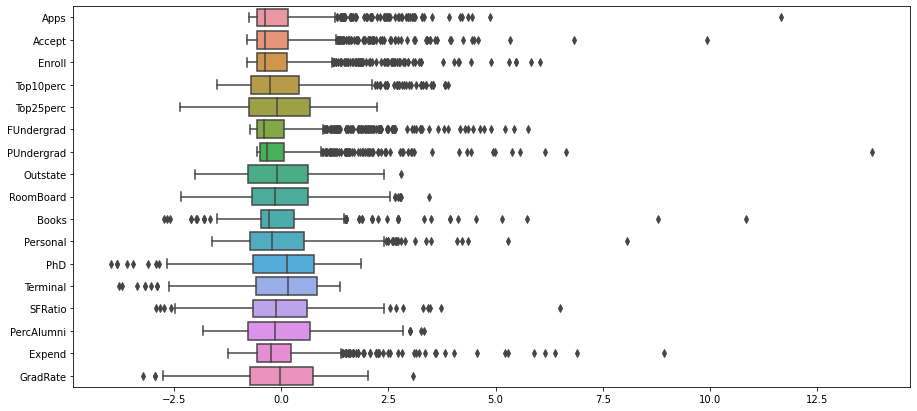

Observations:
1.The Scaled dataset has all similar max values and comparable minimum values.
2.After scaling the data mean value of each variable is comparable.
3.The range of each variable is now standardized.


In [56]:
# Answer for 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here
print(" Before scaling we have checked outliers by using boxplot and the data looks like-")
plt.figure(figsize=(15,7))
sns.boxplot(data=df2,orient='h')
plt.show()
print("After scaling the data we are checking outliers by using same boxplot and the data looks like-")
plt.figure(figsize=(15,7))
sns.boxplot(data=df2_pca_scaled,orient='h')
plt.show()
print("Observations:")
print("1.The Scaled dataset has all similar max values and comparable minimum values.")
print("2.After scaling the data mean value of each variable is comparable.")
print("3.The range of each variable is now standardized.")

In [57]:
# Answer for 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]
#Apply PCA taking all features
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df2_pca_scaled)

In [58]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [59]:
#EIGEN VALUES : which are always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [60]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

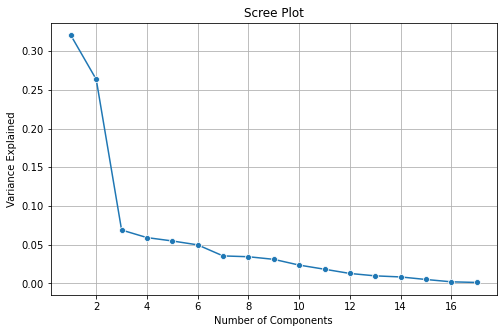

In [61]:
#Created a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [62]:
# Answer for 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features
#Check the selected PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2','PC3', 'PC4','PC5','PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11','PC12','PC13',
                                                'PC14','PC15','PC16','PC17'],
                                    index = df2_pca_scaled.columns)
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps        0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept      0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll      0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc   0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc   0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
FUndergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
PUndergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate    0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
RoomBoard   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books       0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal   -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD         0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal    0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
SFRatio    -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
PercAlumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend      0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
GradRate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
Apps       -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept     -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll     -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc  -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc  -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
FUndergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
PUndergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate    0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
RoomBoard   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books      -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal    0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD        -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal   -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
SFRatio     0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
PercAlumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend     -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
GradRate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                PC13      PC14      PC15      PC16      PC17  
Apps        0.595831  0.080633  0.133406  0.459139  0.358970  
Accept      0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll     -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc   0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc   0.021884  0.151742 -0.617275  0.051868  0.080348  
FUndergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
PUndergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate   -0.141856 -0.034012  0.038354  0.101595  0.050900  
RoomBoard  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books       0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal    0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD         0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal   -0.058313  0.671009  0.158910 -0.027076  0.006209  
SFRatio    -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
PercAlumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend     -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
GradRate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

In [63]:
# Answer for 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]
#In order to calculate PC scores we need loadings, below:
print("First PC named PC1:")
print(round(df_extracted_loadings.iloc[:,0],2))
print('')
print("Linear equation of Expilcit form for the first PC which is (PC1):")
print("PC1=0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * FUndergrad + 0.03 * PUndergrad+")
print("0.29 * Outstate + 0.25 * RoomBoard + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal +  -0.18 * SFRatio +")
print("0.21 * PercAlumni + 0.32 * Expend + 0.25 * GradRate")

First PC named PC1:
Apps          0.25
Accept        0.21
Enroll        0.18
Top10perc     0.35
Top25perc     0.34
FUndergrad    0.15
PUndergrad    0.03
Outstate      0.29
RoomBoard     0.25
Books         0.06
Personal     -0.04
PhD           0.32
Terminal      0.32
SFRatio      -0.18
PercAlumni    0.21
Expend        0.32
GradRate      0.25
Name: PC1, dtype: float64

Linear equation of Expilcit form for the first PC which is (PC1):
PC1=0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * FUndergrad + 0.03 * PUndergrad+
0.29 * Outstate + 0.25 * RoomBoard + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal +  -0.18 * SFRatio +
0.21 * PercAlumni + 0.32 * Expend + 0.25 * GradRate


In [64]:
# Answer for 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?
#Check the cumulative explained variance ratio to find a cut off for selecting the number of PCs
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [65]:
# Answer for 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]
print("* PCA is a statistical technique and uses orthogonal transformation to convert a set of obersvations of possibly correlated")
print("variables into a set of values of linearly uncorrelated varibales.")
print("* PCA tool is also used to reduce multidimensional data to lower dimensional data.")
print("* Principal Component Analysis is a well established mathematical technique for reducing demensionality of the data, while keeping as much variation as possible. ")
print("* In the given dataset we have 18 varibales, so by using PCA technique we will reduce those to just 7 components which will")
print("capture 85.21% variance in the dataset.")

* PCA is a statistical technique and uses orthogonal transformation to convert a set of obersvations of possibly correlated
variables into a set of values of linearly uncorrelated varibales.
* PCA tool is also used to reduce multidimensional data to lower dimensional data.
* Principal Component Analysis is a well established mathematical technique for reducing demensionality of the data, while keeping as much variation as possible. 
* In the given dataset we have 18 varibales, so by using PCA technique we will reduce those to just 7 components which will
capture 85.21% variance in the dataset.
